<a href="https://colab.research.google.com/github/pvuppal/prudhvi/blob/main/prudhvivuppalapati_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv("/content/auto-mpg.csv")

In [ ]:
print(df)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1      

In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)
symmetric_numeric = []
skewed_numeric = []
numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
categorical_columns = ['origin', 'car name']

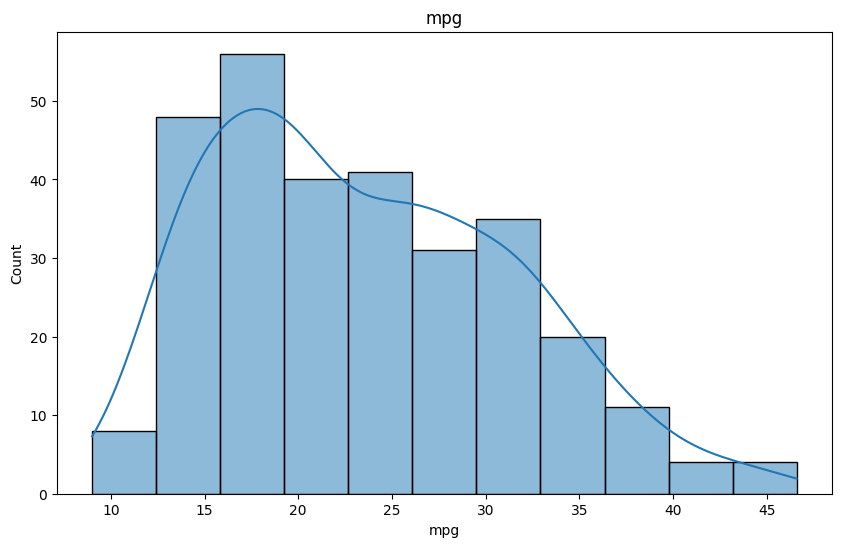

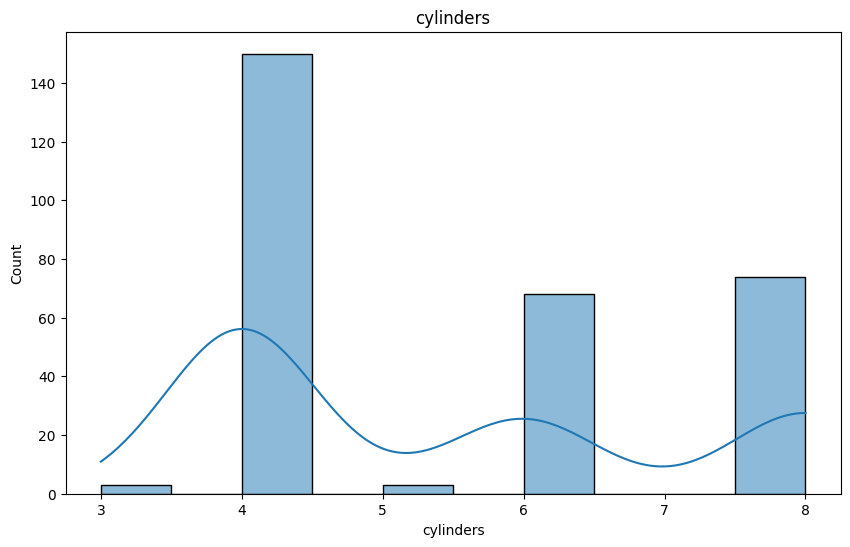

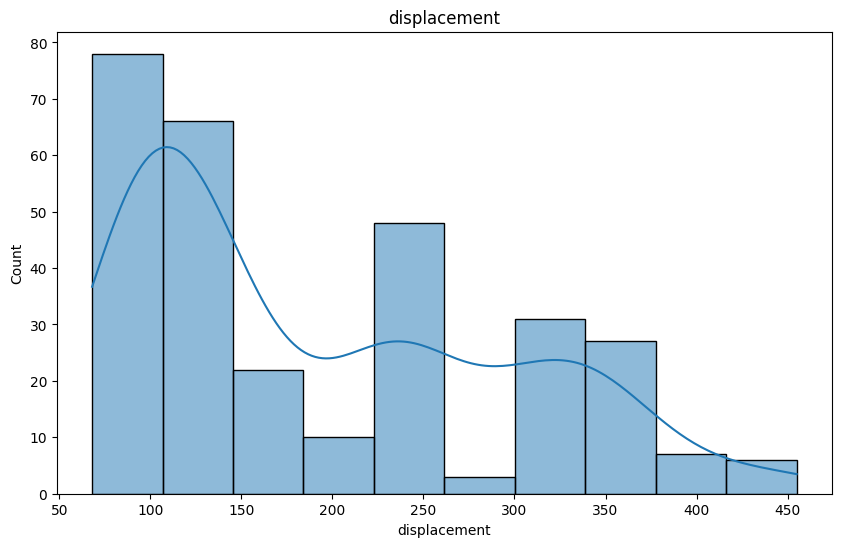

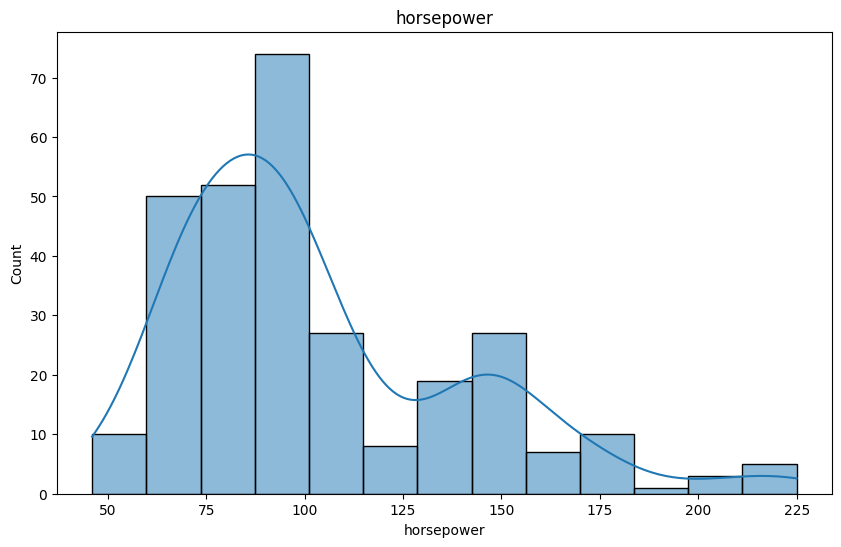

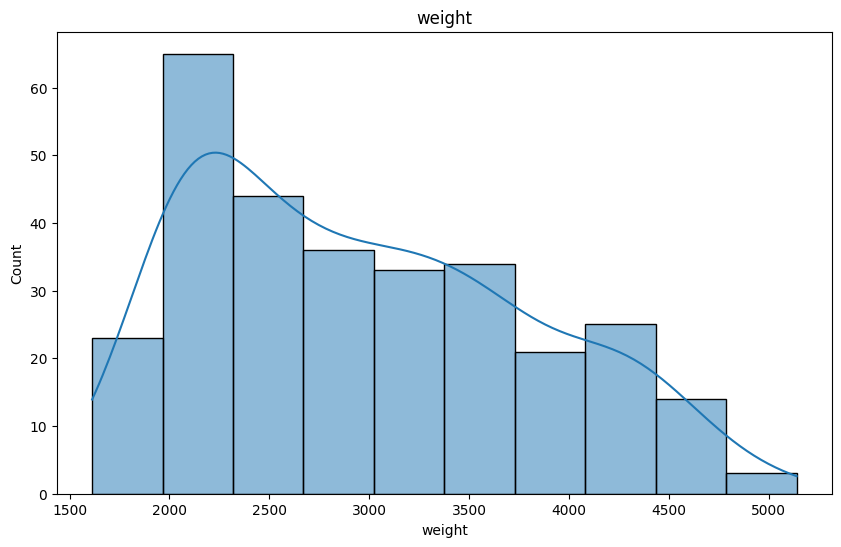

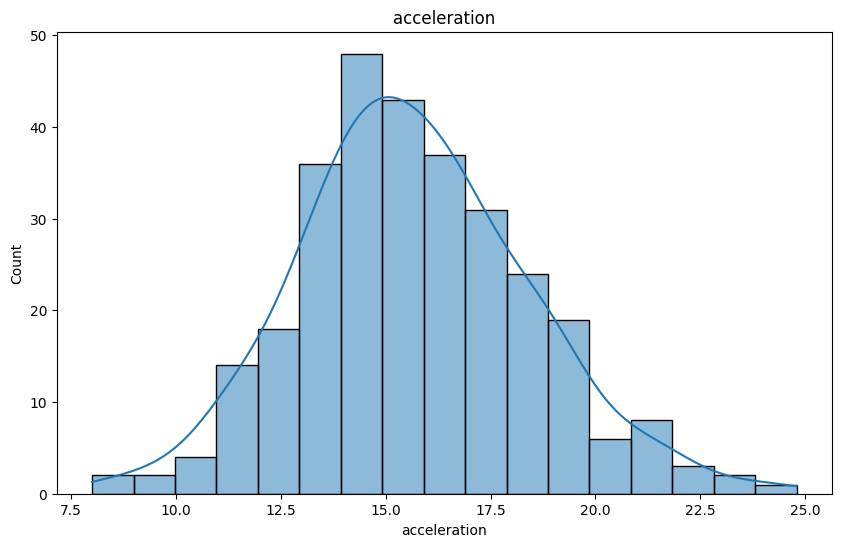

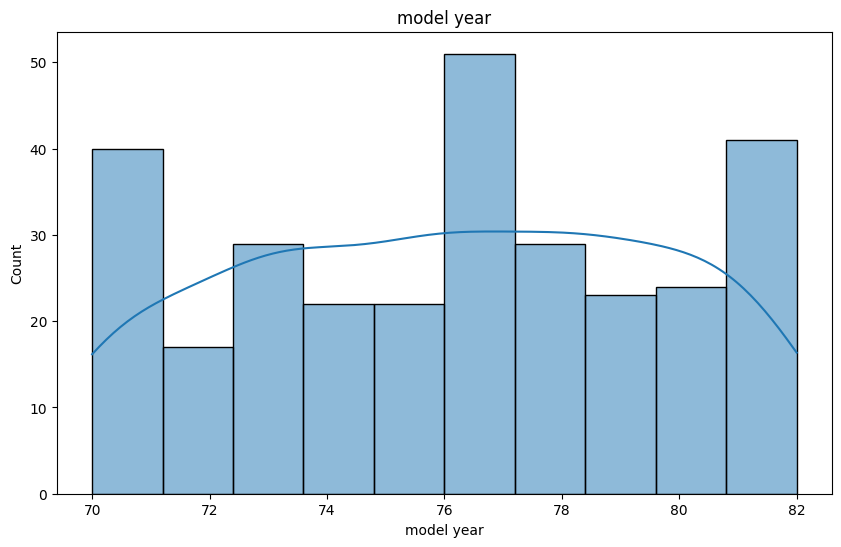

Symmetric Numeric Columns: ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year']
Skewed Numeric Columns: ['horsepower']
Categorical Columns: ['origin', 'car name']


In [ ]:
symmetric_numeric = []
skewed_numeric = []

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[col], kde=True)
    plt.title(col)
    plt.show()

    skewness = train_df[col].skew()
    if skewness > 0.7 or skewness < -0.7:
        skewed_numeric.append(col)
    else:
        symmetric_numeric.append(col)

print("Symmetric Numeric Columns:", symmetric_numeric)
print("Skewed Numeric Columns:", skewed_numeric)
print("Categorical Columns:", categorical_columns)

In [ ]:
log_transformer = FunctionTransformer(np.log1p)

In [ ]:
numeric_features = ['mpg'] + symmetric_numeric + skewed_numeric
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num_symmetric', numeric_transformer, symmetric_numeric),
        ('num_skewed', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('log_transform', log_transformer),
            ('scaler', StandardScaler())
        ]), skewed_numeric),
        ('cat', categorical_transformer, categorical_columns)
    ]
)
X_train_processed = preprocessor.fit_transform(train_df)
X_test_processed = preprocessor.transform(test_df)
print("Shape of Processed Training Data:", X_train_processed.shape)
print("Shape of Processed Testing Data:", X_test_processed.shape)


Shape of Processed Training Data: (298, 242)
Shape of Processed Testing Data: (100, 242)
